___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


In [3]:
import pandas_datareader.data 
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2016, 1, 27)
#BAC
BAC = data.DataReader('BAC', 'iex', start, end)
#Citigroup
C = data.DataReader('C', 'iex', start, end)
#Goldman Sachs
GS = data.DataReader('GS', 'iex', start, end)
GS.head()
#JPMorgan chase
JPM = data.DataReader('JPM', 'iex', start, end)
#Morgan Stanley
MS=data.DataReader('MS', 'iex', start, end)
#Wells Fargo
WFC = data.DataReader('WFC', 'iex', start, end)
WFC

,open,high,low,close,volume
date,,,,,
2014-03-18,41.6760,41.9183,41.6327,41.8750,9757390
2014-03-19,41.8577,41.8836,41.0790,41.3645,28292983
2014-03-20,41.2694,42.7056,41.2694,42.4201,25208403
2014-03-21,43.0776,43.2333,42.4287,42.4979,31046062
2014-03-24,42.8094,42.8180,42.2384,42.3768,19677616
2014-03-25,42.6104,42.6277,42.3162,42.3595,14659355
2014-03-26,42.5585,42.5671,41.9269,41.9615,17399843
2014-03-27,42.8354,43.0776,42.0913,42.4806,29075059
2014-03-28,42.5152,42.9240,42.4374,42.6450,15008037


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [4]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                              C           \
               open     high      low    close     volume     open     high   
date                                                                          
2014-03-18  15.9281  16.0024  15.8630  15.9745   67402402  45.1455  45.5142   
2014-03-19  15.9466  16.2533  15.9095  16.2068  105006477  45.5899  46.8191   
2014-03-20  16.2068  16.7273  16.1976  16.6529  167048671  46.6015  47.7077   
2014-03-21  16.7551  16.7551  16.3184  16.3184  156026291  48.2182  48.2182   
2014-03-24  16.3741  16.4020  16.0767  16.1418  118499989  47.4619  47.8873   

                                        ...       MS                    \
                low    close    volume  ...     open     high      low   
date                                    ...                              
2014-03-18  44.9092  45.5142  19517186  ...  28.4922  28.7735  28.4423   
2014-03-19  45.4008  46.2706  30308826  ...  28.7191  29.1002  28.4832   
2014-03-20  46.3368  47.4808  33885644  ...  28.9822  30.0348  28.7554   
2014-03-21  47.1404  47.3484  38406929  ...  30.1528  30.1709  29.3724   
2014-03-24  47.0648  47.3201  21170311  ...  29.6991  29.7172  29.1909   

                                   WFC                                       
              close    volume     open     high      low    close    volume  
date                                                                         
2014-03-18  28.7191   6614854  41.6760  41.9183  41.6327  41.8750   9757390  
2014-03-19  28.8643   9470327  41.8577  41.8836  41.0790  41.3645  28292983  
2014-03-20  29.7535  20199764  41.2694  42.7056  41.2694  42.4201  25208403  
2014-03-21  29.5811  23503898  43.0776  43.2333  42.4287  42.4979  31046062  
2014-03-24  29.4359  10400085  42.8094  42.8180  42.2384  42.3768  19677616  

[5 rows x 30 columns]

In [6]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-03-18   15.9281  16.0024  15.8630  15.9745   67402402  45.1455  45.5142   
2014-03-19   15.9466  16.2533  15.9095  16.2068  105006477  45.5899  46.8191   
2014-03-20   16.2068  16.7273  16.1976  16.6529  167048671  46.6015  47.7077   
2014-03-21   16.7551  16.7551  16.3184  16.3184  156026291  48.2182  48.2182   
2014-03-24   16.3741  16.4020  16.0767  16.1418  118499989  47.4619  47.8873   

Bank Ticker                              ...       MS                    \
Stock Info       low    close    volume  ...     open     high      low   
date                                     ...                              
2014-03-18   44.9092  45.5142  19517186  ...  28.4922  28.7735  28.4423   
2014-03-19   45.4008  46.2706  30308826  ...  28.7191  29.1002  28.4832   
2014-03-20   46.3368  47.4808  33885644  ...  28.9822  30.0348  28.7554   
2014-03-21   47.1404  47.3484  38406929  ...  30.1528  30.1709  29.3724   
2014-03-24   47.0648  47.3201  21170311  ...  29.6991  29.7172  29.1909   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-03-18   28.7191   6614854  41.6760  41.9183  41.6327  41.8750   9757390  
2014-03-19   28.8643   9470327  41.8577  41.8836  41.0790  41.3645  28292983  
2014-03-20   29.7535  20199764  41.2694  42.7056  41.2694  42.4201  25208403  
2014-03-21   29.5811  23503898  43.0776  43.2333  42.4287  42.4979  31046062  
2014-03-24   29.4359  10400085  42.8094  42.8180  42.2384  42.3768  19677616  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-03-18   15.9281  16.0024  15.8630  15.9745   67402402  45.1455  45.5142   
2014-03-19   15.9466  16.2533  15.9095  16.2068  105006477  45.5899  46.8191   
2014-03-20   16.2068  16.7273  16.1976  16.6529  167048671  46.6015  47.7077   
2014-03-21   16.7551  16.7551  16.3184  16.3184  156026291  48.2182  48.2182   
2014-03-24   16.3741  16.4020  16.0767  16.1418  118499989  47.4619  47.8873   

Bank Ticker                              ...       MS                    \
Stock Info       low    close    volume  ...     open     high      low   
date                                     ...                              
2014-03-18   44.9092  45.5142  19517186  ...  28.4922  28.7735  28.4423   
2014-03-19   45.4008  46.2706  30308826  ...  28.7191  29.1002  28.4832   
2014-03-20   46.3368  47.4808  33885644  ...  28.9822  30.0348  28.7554   
2014-03-21   47.1404  47.3484  38406929  ...  30.1528  30.1709  29.3724   
2014-03-24   47.0648  47.3201  21170311  ...  29.6991  29.7172  29.1909   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-03-18   28.7191   6614854  41.6760  41.9183  41.6327  41.8750   9757390  
2014-03-19   28.8643   9470327  41.8577  41.8836  41.0790  41.3645  28292983  
2014-03-20   29.7535  20199764  41.2694  42.7056  41.2694  42.4201  25208403  
2014-03-21   29.5811  23503898  43.0776  43.2333  42.4287  42.4979  31046062  
2014-03-24   29.4359  10400085  42.8094  42.8180  42.2384  42.3768  19677616  

[5 rows x 30 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()
#bank_stocks.head()

Bank Ticker
BAC     17.3655
C       57.1492
GS     207.2272
JPM     64.0731
MS      37.3853
WFC     52.3837
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns=pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick + ' Return']=bank_stocks[tick]['close'].pct_change()
 

In [11]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2014-03-18,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-19,0.014542,0.016619,0.000535,0.004133,0.005056,-0.012191
2014-03-20,0.027525,0.026155,0.006184,0.031048,0.030806,0.025519
2014-03-21,-0.020087,-0.002788,-0.013414,0.000998,-0.005794,0.001834
2014-03-24,-0.010822,-0.000598,-0.007367,0.014958,-0.004909,-0.002850


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

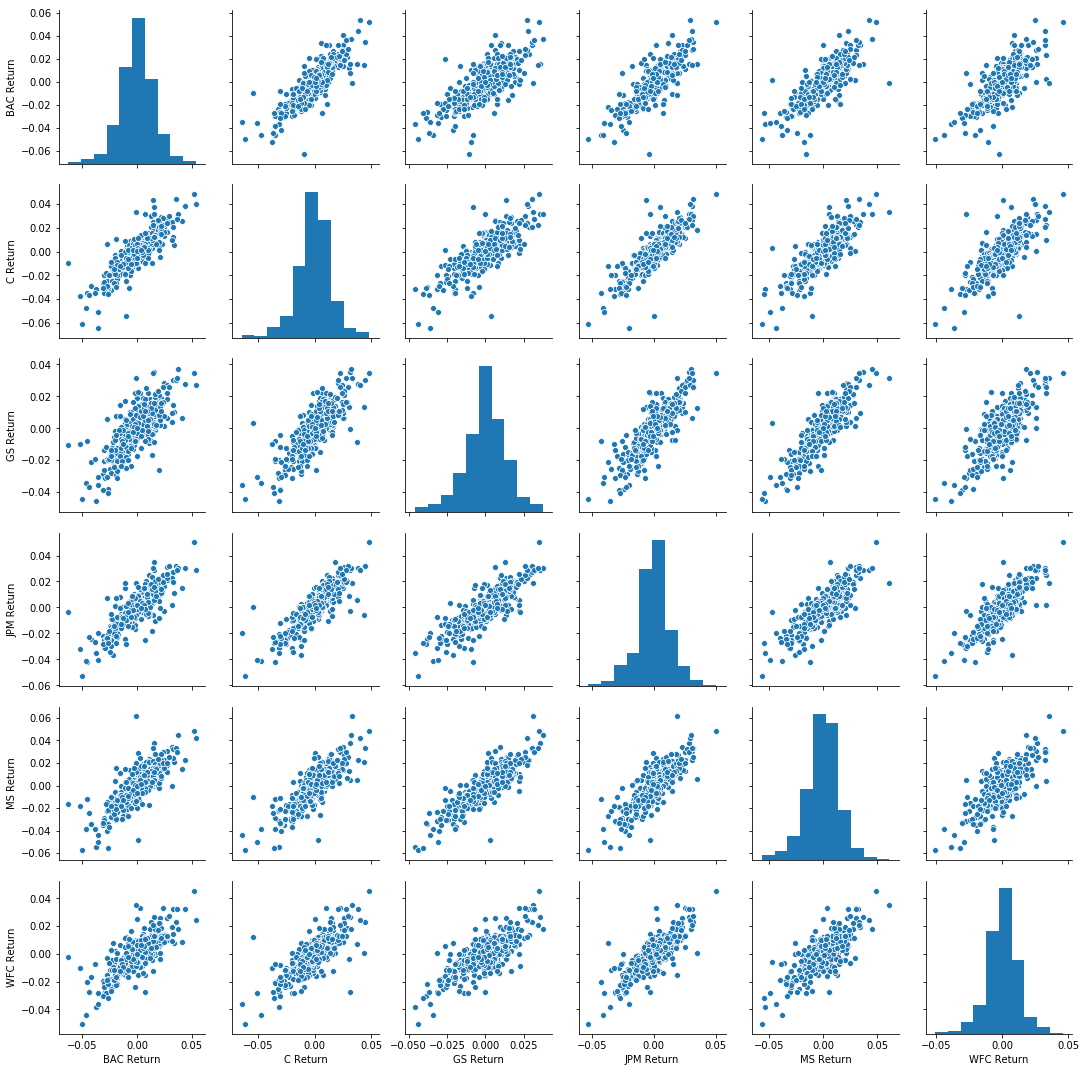

In [15]:
import seaborn as sns
sns.pairplot(returns[1:])

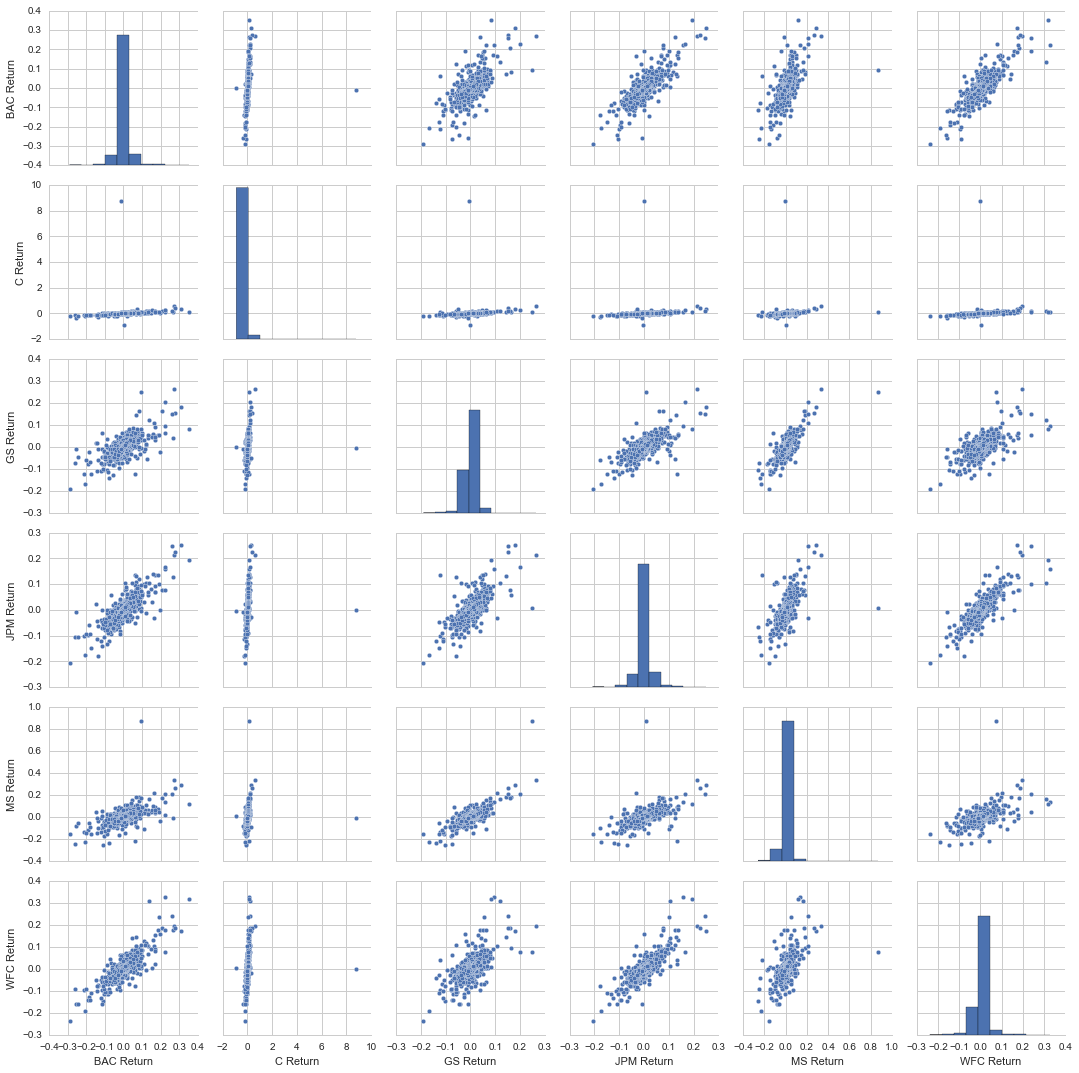

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [19]:
returns.min()
returns.max()

BAC Return    0.053662
C Return      0.048115
GS Return     0.037236
JPM Return    0.050074
MS Return     0.061231
WFC Return    0.045581
dtype: float64

In [20]:
returns['BAC Return'].max()

0.05366241112768555

In [22]:
returns['BAC Return'].argmin()   #argmax will return the date,time when this value comes

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


'2014-04-28'

In [24]:
returns.idxmin()   #it will give when min value happen for all column

BAC Return    2014-04-28
C Return      2016-01-15
GS Return     2015-08-21
JPM Return    2015-08-24
MS Return     2015-08-24
WFC Return    2015-08-24
dtype: object

In [25]:
returns.idxmax()   #it will give when max value happen for all column

BAC Return    2015-10-28
C Return      2015-08-26
GS Return     2015-11-06
JPM Return    2015-08-26
MS Return     2015-03-12
WFC Return    2015-08-26
dtype: object

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [27]:
returns.std()

BAC Return    0.015450
C Return      0.014738
GS Return     0.013263
JPM Return    0.013190
MS Return     0.015578
WFC Return    0.011683
dtype: float64

In [28]:
returns.ix['2015-01-01':'2015-12-31'].std()

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


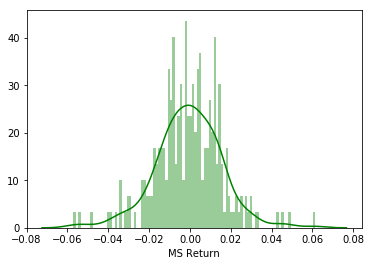

In [31]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\akaur34\

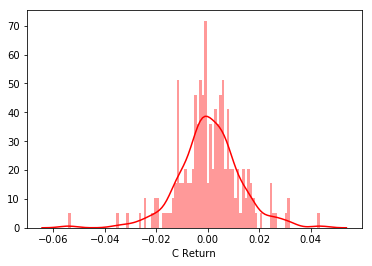

In [34]:
sns.distplot(returns.ix['2014-01-01':'2014-12-31']['C Return'],color='red',bins=100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



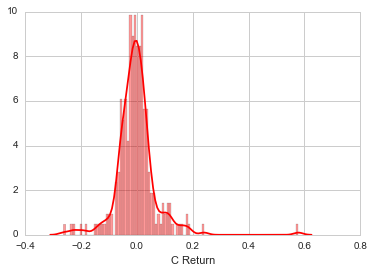

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

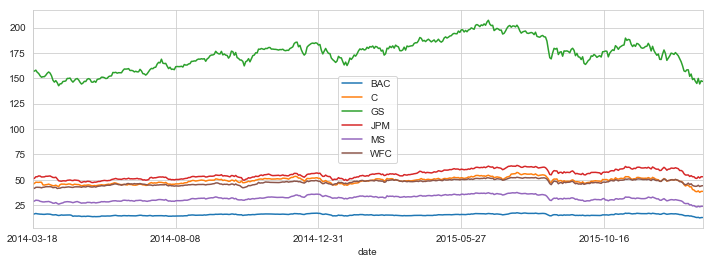

In [37]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick,figsize=(12,4))
plt.legend()

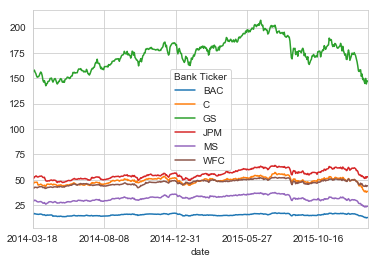

In [38]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

In [39]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



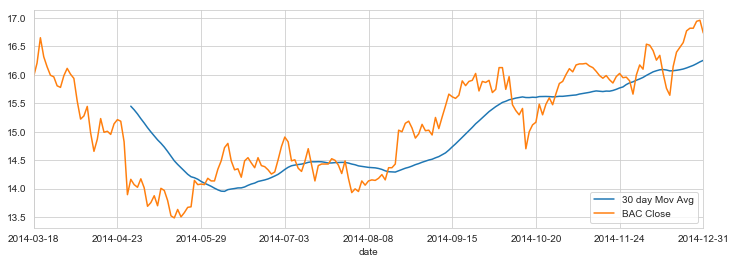

In [42]:
plt.figure(figsize=(12,4))
BAC['close'].ix['2014-01-01':'2015-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['close'].ix['2014-01-01':'2015-01-01'].plot(label='BAC Close')
plt.legend()



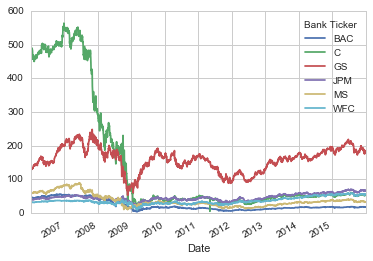

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

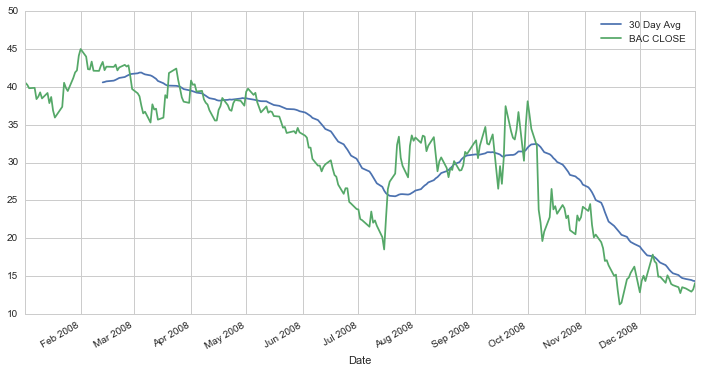

** Create a heatmap of the correlation between the stocks Close Price.**

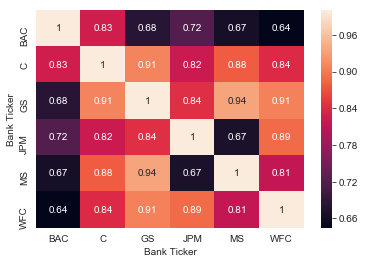

In [46]:
# sns heatmap
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

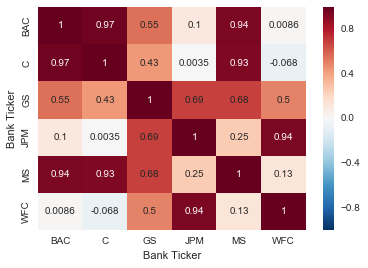

** Optional: Use seaborn's clustermap to cluster the correlations together:**

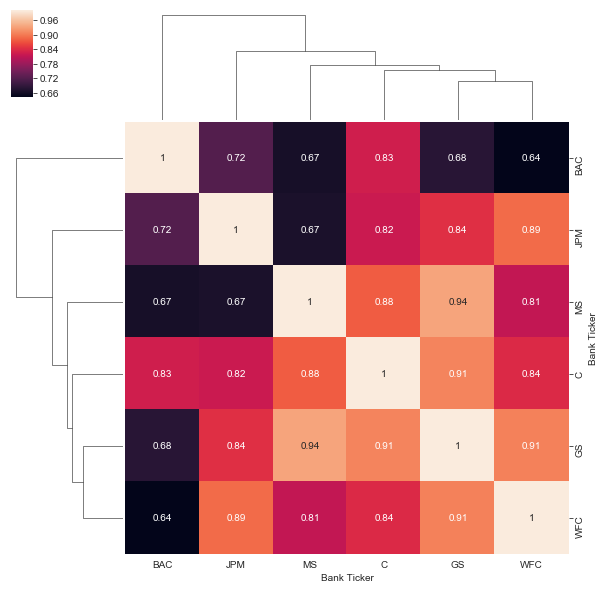

In [47]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

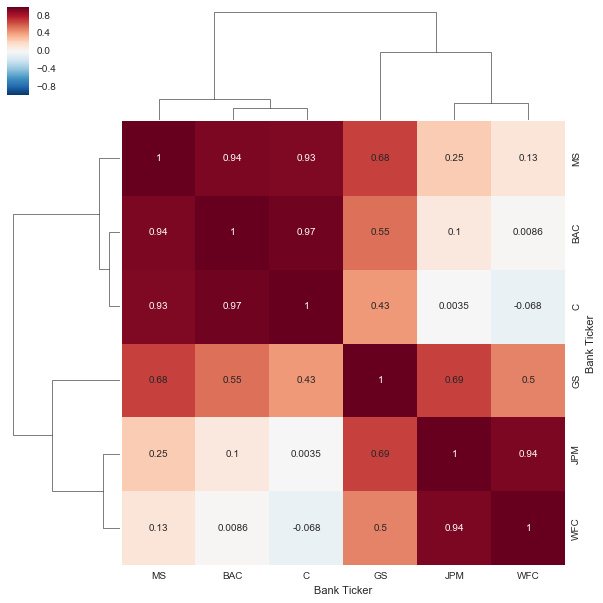

In [54]:
close_corr=(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr())
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [56]:
bac15=BAC[['open','high','low','close']].ix['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [58]:
MS['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [59]:
BAC['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\akaur34\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.